# setup and load data

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip list

Package                           Version
--------------------------------- --------------
absl-py                           2.3.1
aiofiles                          23.2.1
altgraph                          0.17.2
annotated-types                   0.7.0
anyio                             4.8.0
appnope                           0.1.4
argon2-cffi                       23.1.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
asttokens                         3.0.0
astunparse                        1.6.3
async-lru                         2.0.4
attrs                             25.1.0
babel                             2.17.0
beautifulsoup4                    4.13.3
bleach                            6.2.0
blinker                           1.9.0
blis                              1.3.0
catalogue                         2.0.10
certifi                           2025.1.31
cffi                              1.17.1
charset-normalizer                3.4.1
click           

In [3]:
import tensorflow as tf
import os

/Users/nithinboyina/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
os.path.join("data/happy")

'data/happy'

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [6]:
len(gpus)

1

In [7]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# to avoid model using the full potential we make it restricted
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## remove dodgy images

In [9]:
import os
os.getcwd()


'/Users/nithinboyina/Deep CNN Classifier'

In [10]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [11]:
data_dir='data'

In [12]:
image_exts=['jpeg','jpg','bmp','png']

In [13]:
os.listdir(os.path.join(data_dir,))

['happy ', '.ipynb_checkpoints', 'sad ']

In [14]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image data/happy /.ipynb_checkpoints
Issue with image data/sad /.ipynb_checkpoints


## load data

In [15]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [18]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 205 files belonging to 2 classes.


2025-08-06 16:33:58.268651: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-08-06 16:33:58.268840: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-06 16:33:58.268846: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-06 16:33:58.269065: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-06 16:33:58.269086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
data_iterator=data.as_numpy_iterator()

In [20]:
batch=data_iterator.next()

In [21]:
batch[0].shape

(32, 256, 256, 3)

In [22]:
batch[1]

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

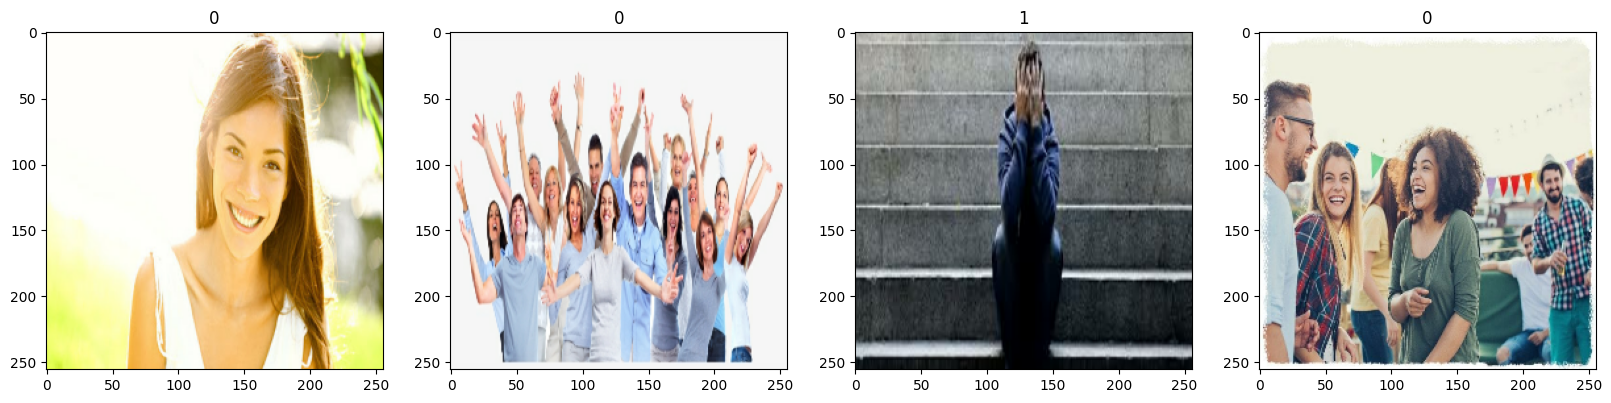

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2.preprocess data

# scale data

In [24]:
data=data.map(lambda x,y:(x/255,y))

In [25]:
scaled_iterator=data.as_numpy_iterator()

In [26]:
batch=scaled_iterator.next()

In [27]:
batch[0].max()

1.0

In [28]:
batch[0].min()

0.0

## split data

In [29]:
len(data)

7

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [31]:
train_size

4

In [32]:
val_size

2

In [33]:
test_size

1

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(train)

4

# Deep Model

## Building Deep neural network Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/nithinboyina/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir='logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-08-06 16:39:06.019979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.4177 - loss: 3.9136 - val_accuracy: 0.7344 - val_loss: 0.5281
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - accuracy: 0.5063 - loss: 1.3404 - val_accuracy: 0.5469 - val_loss: 1.1510
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - accuracy: 0.3938 - loss: 1.3221 - val_accuracy: 0.6719 - val_loss: 0.6758
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 299ms/step - accuracy: 0.7656 - loss: 0.6070 - val_accuracy: 0.7344 - val_loss: 0.6637
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 549ms/step - accuracy: 0.7010 - loss: 0.6614 - val_accuracy: 0.6406 - val_loss: 0.6721
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.6187 - loss: 0.6798 - val_accuracy: 0.5781 - val_loss: 0.6736
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.5323 - loss: 0.6832 - val_accuracy: 0.5781 - val_loss: 0.6550
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step - accuracy: 0.6010 - loss: 0.6598 - val_accuracy: 0.7031 - val_loss: 0.5974
Epo

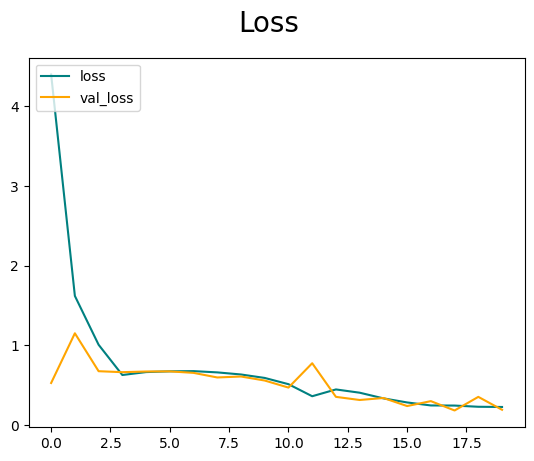

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


2025-08-06 16:48:07.008017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
print(f'precision : {pre.result().numpy()}, recall:{re.result().numpy()}, accuracy:{acc.result().numpy()}')

precision : 1.0, recall:1.0, accuracy:1.0


# Test

In [53]:
import cv2

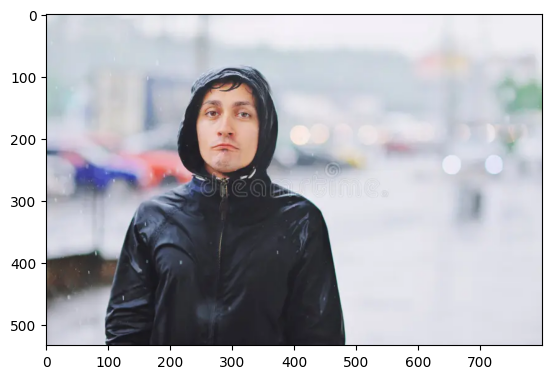

In [60]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

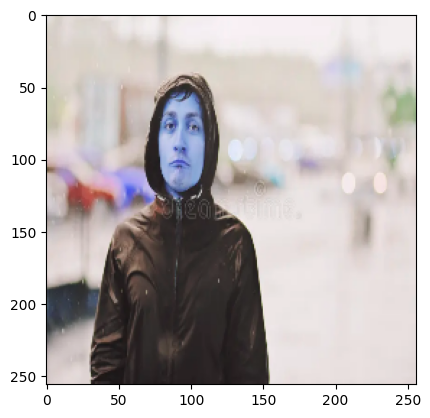

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [63]:
yhat

array([[0.6872748]], dtype=float32)

In [64]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# Saving model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models','happysad.h5'))

In [69]:
new_model = load_model(os.path.join('models','happysad.h5'))

In [71]:
yhat_new=new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [72]:
if yhat_new > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
